In [1]:
#%pip install pandas
#%pip install openpyxl
#%pip install matplotlib
#%pip install seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import PercentFormatter
from scipy.stats import chi2_contingency

In [3]:
print(pd.__version__)

1.4.2


In [4]:
df = pd.read_excel('Data_for_Topic2.xlsx', sheet_name = 'Data1', header = 0)

In [5]:
df

,H,1,2,3,4,5,6,7,8,9
0,1,1,34,4,1,4,2960.0,4.0,3,2
1,2,1,67,1,1,1,980.0,1.0,5,2
2,3,2,46,3,3,5,3500.0,4.0,2,4
3,4,1,22,2,2,3,860.0,1.0,5,3
4,5,2,30,5,2,4,3380.0,4.0,2,3
...,...,...,...,...,...,...,...,...,...,...
97,98,1,38,1,2,4,1380.0,1.0,4,3
98,99,1,56,2,2,1,1700.0,2.0,3,3
99,100,1,42,5,1,5,4430.0,5.0,2,4
100,101,2,36,1,2,1,1100.0,1.0,5,1


# See if there are any missing values ​​in the data (However, you don't have to do anything about them now)

In [6]:
df.isnull().sum()

H    0
1    0
2    0
3    0
4    0
5    0
6    2
7    1
8    0
9    0
dtype: int64

# List the first few lines

In [7]:
df.head()

,H,1,2,3,4,5,6,7,8,9
0,1,1,34,4,1,4,2960.0,4.0,3,2
1,2,1,67,1,1,1,980.0,1.0,5,2
2,3,2,46,3,3,5,3500.0,4.0,2,4
3,4,1,22,2,2,3,860.0,1.0,5,3
4,5,2,30,5,2,4,3380.0,4.0,2,3


# (Re)name the columns according to the explanations found in the Excel file

In [8]:
df.columns = ['H', 'gender', 'age', 'family_size', 'house', 'education', 'income', 'purchases_household', 'sat_product_range', 'sat_price']
df

,H,gender,age,family_size,house,education,income,purchases_household,sat_product_range,sat_price
0,1,1,34,4,1,4,2960.0,4.0,3,2
1,2,1,67,1,1,1,980.0,1.0,5,2
2,3,2,46,3,3,5,3500.0,4.0,2,4
3,4,1,22,2,2,3,860.0,1.0,5,3
4,5,2,30,5,2,4,3380.0,4.0,2,3
...,...,...,...,...,...,...,...,...,...,...
97,98,1,38,1,2,4,1380.0,1.0,4,3
98,99,1,56,2,2,1,1700.0,2.0,3,3
99,100,1,42,5,1,5,4430.0,5.0,2,4
100,101,2,36,1,2,1,1100.0,1.0,5,1


# If necessary, delete any columns that you think are unnecessary

In [9]:
df.drop('H', axis = 1)

,gender,age,family_size,house,education,income,purchases_household,sat_product_range,sat_price
0,1,34,4,1,4,2960.0,4.0,3,2
1,1,67,1,1,1,980.0,1.0,5,2
2,2,46,3,3,5,3500.0,4.0,2,4
3,1,22,2,2,3,860.0,1.0,5,3
4,2,30,5,2,4,3380.0,4.0,2,3
...,...,...,...,...,...,...,...,...,...
97,1,38,1,2,4,1380.0,1.0,4,3
98,1,56,2,2,1,1700.0,2.0,3,3
99,1,42,5,1,5,4430.0,5.0,2,4
100,2,36,1,2,1,1100.0,1.0,5,1


# Print a summary of the variables

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   H                    102 non-null    int64  
 1   gender               102 non-null    int64  
 2   age                  102 non-null    int64  
 3   family_size          102 non-null    int64  
 4   house                102 non-null    int64  
 5   education            102 non-null    int64  
 6   income               100 non-null    float64
 7   purchases_household  101 non-null    float64
 8   sat_product_range    102 non-null    int64  
 9   sat_price            102 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 8.1 KB


In [11]:
df.describe()

,H,gender,age,family_size,house,education,income,purchases_household,sat_product_range,sat_price
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,100.000000,101.000000,102.000000,102.000000
mean,51.500000,1.313725,41.176471,2.705882,1.745098,3.205882,2365.700000,2.584158,3.500000,2.754902
std,29.588849,0.466298,12.779479,1.583255,0.684861,1.402531,960.653455,1.151237,1.149688,0.969192
min,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000,770.000000,1.000000,1.000000,1.000000
25%,26.250000,1.000000,31.000000,1.000000,1.000000,2.000000,1667.500000,2.000000,3.000000,2.000000
50%,51.500000,1.000000,39.500000,2.000000,2.000000,4.000000,2205.000000,2.000000,3.000000,3.000000
75%,76.750000,2.000000,50.000000,4.000000,2.000000,4.000000,2990.000000,3.000000,5.000000,3.000000
max,102.000000,2.000000,72.000000,7.000000,3.000000,5.000000,4850.000000,5.000000,5.000000,5.000000


# Investigate a few qualitative variables and calculate counts for their values

### Gender

In [12]:
gender_df = pd.crosstab(df['gender'], 'Count')
gender_df.index = ['woman', 'man']
gender_df.columns.name = 'Gender'
gender_df

Gender,Count
woman,70
man,32


### Housing

In [13]:
house_df = pd.crosstab(df['house'], 'Count')
house_df.index = ['own apartment', 'rental apartment', 'employee housing']
house_df.columns.name = 'Housing type'
house_df

Housing type,Count
own apartment,40
rental apartment,48
employee housing,14


### Education

In [14]:
education_df = pd.crosstab(df['education'], 'Count')
education_df.index = ['primary school', 'vocational school', 'secondary school', 'applied science university', 'other university']
education_df.columns.name = 'Education type'
education_df

Education type,Count
primary school,16
vocational school,22
secondary school,10
applied science university,33
other university,21


### Product satisfaction

In [15]:
sat_product_range_df = pd.crosstab(df['sat_product_range'], 'Count')
sat_product_range_df.index = ['Very unsatisfied', 'Unsatisfied', 'Neutral', 'Satisfied', 'Very satisfied']
sat_product_range_df.columns.name = 'Product satisfaction type'
sat_product_range_df

Product satisfaction type,Count
Very unsatisfied,2
Unsatisfied,21
Neutral,30
Satisfied,22
Very satisfied,27


### Price satisfaction

In [16]:
sat_price_df = pd.crosstab(df['sat_price'], 'Count')
sat_price_df.index = ['Very unsatisfied', 'Unsatisfied', 'Neutral', 'Satisfied', 'Very satisfied']
sat_price_df.columns.name = 'Price satisfaction type'
sat_price_df

Price satisfaction type,Count
Very unsatisfied,12
Unsatisfied,25
Neutral,43
Satisfied,20
Very satisfied,2


# Draw a graphs based on the frequency tables

### Gender

(array([0, 1]), [Text(0, 0, 'woman'), Text(1, 0, 'man')])

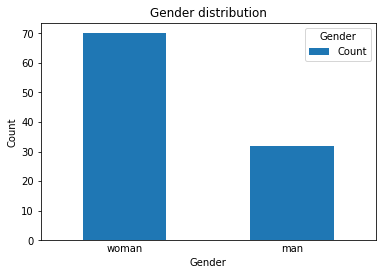

In [17]:
gender_df.plot.bar()
plt.title('Gender distribution')
plt.ylabel('Count')
plt.xlabel('Gender')
plt.tick_params(axis = 'x', length = 0)
plt.xticks(rotation = 0)

### Housing

(array([0, 1, 2]),
 [Text(0, 0, 'own apartment'),
  Text(1, 0, 'rental apartment'),
  Text(2, 0, 'employee housing')])

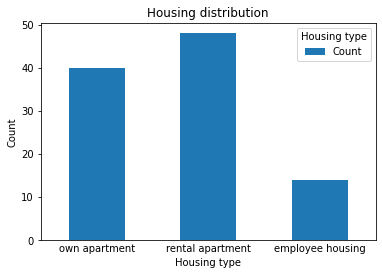

In [18]:
house_df.plot.bar()
plt.title('Housing distribution')
plt.ylabel('Count')
plt.xlabel('Housing type')
plt.tick_params(axis = 'x', length = 0)
plt.xticks(rotation = 0)

### Education

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'primary school'),
  Text(1, 0, 'vocational school'),
  Text(2, 0, 'secondary school'),
  Text(3, 0, 'applied science university'),
  Text(4, 0, 'other university')])

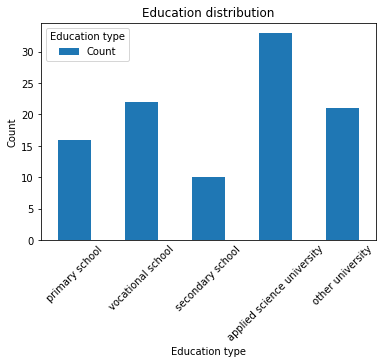

In [19]:
education_df.plot.bar()
plt.title('Education distribution')
plt.ylabel('Count')
plt.xlabel('Education type')
plt.tick_params(axis = 'x', length = 0)
plt.xticks(rotation = 45)

### Product satisfaction

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Very unsatisfied'),
  Text(1, 0, 'Unsatisfied'),
  Text(2, 0, 'Neutral'),
  Text(3, 0, 'Satisfied'),
  Text(4, 0, 'Very satisfied')])

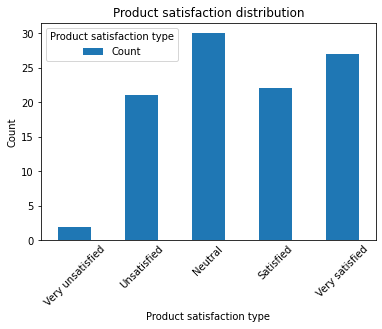

In [20]:
sat_product_range_df.plot.bar()
plt.title('Product satisfaction distribution')
plt.ylabel('Count')
plt.xlabel('Product satisfaction type')
plt.tick_params(axis = 'x', length = 0)
plt.xticks(rotation = 45)

### Price satisfaction

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Very unsatisfied'),
  Text(1, 0, 'Unsatisfied'),
  Text(2, 0, 'Neutral'),
  Text(3, 0, 'Satisfied'),
  Text(4, 0, 'Very satisfied')])

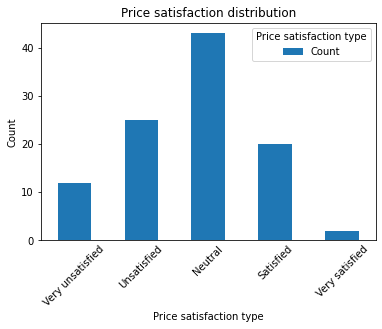

In [21]:
sat_price_df.plot.bar()
plt.title('Price satisfaction distribution')
plt.ylabel('Count')
plt.xlabel('Price satisfaction type')
plt.tick_params(axis = 'x', length = 0)
plt.xticks(rotation = 45)

# Instead of using frequencies, use percentages

### Gender

In [22]:
gender_df_1 = pd.crosstab(df['gender'], 'Count')
gender_df_1['%'] = gender_df_1['Count'] / gender_df_1['Count'].sum() * 100
gender_df_1.index = ['woman', 'man']
gender_df_1.columns.name = 'Gender'
gender_df_1

Gender,Count,%
woman,70,68.627451
man,32,31.372549


(array([0, 1]), [Text(0, 0, 'woman'), Text(1, 0, 'man')])

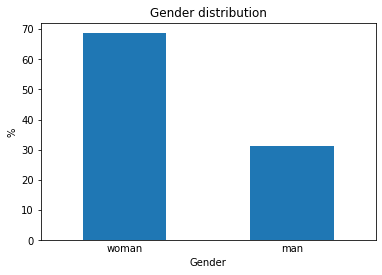

In [23]:
gender_df_1['%'].plot.bar()
plt.title('Gender distribution')
plt.ylabel('%')
plt.xlabel('Gender')
plt.tick_params(axis = 'x', length = 0)
plt.xticks(rotation = 0)

### Housing

In [24]:
house_df_1 = pd.crosstab(df['house'], 'Count')
house_df_1['%'] = house_df_1['Count'] / house_df_1['Count'].sum() * 100
house_df_1.index = ['own apartment', 'rental apartment', 'employee housing']
house_df_1.columns.name = 'Housing type'
house_df_1

Housing type,Count,%
own apartment,40,39.215686
rental apartment,48,47.058824
employee housing,14,13.725490


(array([0, 1, 2]),
 [Text(0, 0, 'own apartment'),
  Text(1, 0, 'rental apartment'),
  Text(2, 0, 'employee housing')])

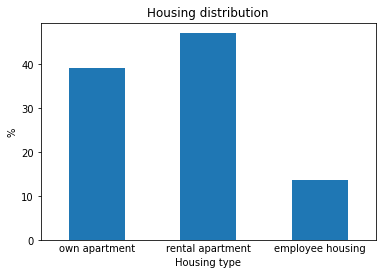

In [25]:
house_df_1['%'].plot.bar()
plt.title('Housing distribution')
plt.ylabel('%')
plt.xlabel('Housing type')
plt.tick_params(axis = 'x', length = 0)
plt.xticks(rotation = 0)

### Education

In [26]:
education_df_1 = pd.crosstab(df['education'], 'Count')
education_df_1['%'] = education_df_1['Count'] / education_df_1['Count'].sum() * 100
education_df_1.index = ['primary school', 'vocational school', 'secondary school', 'applied science university', 'other university']
education_df_1.columns.name = 'Education type'
education_df_1

Education type,Count,%
primary school,16,15.686275
vocational school,22,21.568627
secondary school,10,9.803922
applied science university,33,32.352941
other university,21,20.588235


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'primary school'),
  Text(1, 0, 'vocational school'),
  Text(2, 0, 'secondary school'),
  Text(3, 0, 'applied science university'),
  Text(4, 0, 'other university')])

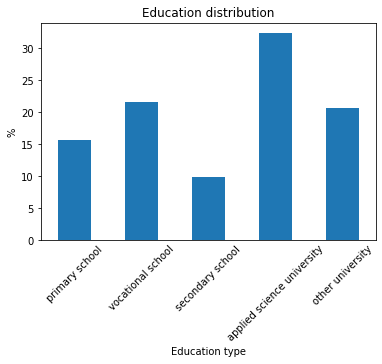

In [27]:
education_df_1['%'].plot.bar()
plt.title('Education distribution')
plt.ylabel('%')
plt.xlabel('Education type')
plt.tick_params(axis = 'x', length = 0)
plt.xticks(rotation = 45)

### Product satisfaction

In [28]:
sat_product_range_df_1 = pd.crosstab(df['sat_product_range'], 'Count')
sat_product_range_df_1['%'] = sat_product_range_df_1['Count'] / sat_product_range_df_1['Count'].sum() * 100
sat_product_range_df_1.index = ['Very unsatisfied', 'Unsatisfied', 'Neutral', 'Satisfied', 'Very satisfied']
sat_product_range_df_1.columns.name = 'Product satisfaction type'
sat_product_range_df_1

Product satisfaction type,Count,%
Very unsatisfied,2,1.960784
Unsatisfied,21,20.588235
Neutral,30,29.411765
Satisfied,22,21.568627
Very satisfied,27,26.470588


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Very unsatisfied'),
  Text(1, 0, 'Unsatisfied'),
  Text(2, 0, 'Neutral'),
  Text(3, 0, 'Satisfied'),
  Text(4, 0, 'Very satisfied')])

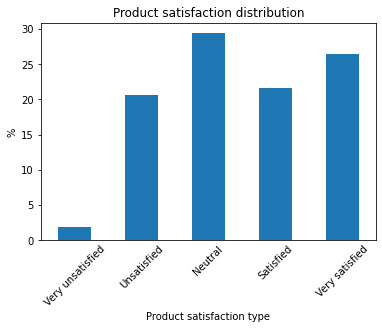

In [29]:
sat_product_range_df_1['%'].plot.bar()
plt.title('Product satisfaction distribution')
plt.ylabel('%')
plt.xlabel('Product satisfaction type')
plt.tick_params(axis = 'x', length = 0)
plt.xticks(rotation = 45)

### Price satisfaction

In [30]:
sat_price_df_1 = pd.crosstab(df['sat_price'], 'Count')
sat_price_df_1['%'] = sat_price_df_1['Count'] / sat_price_df_1['Count'].sum() * 100
sat_price_df_1.index = ['Very unsatisfied', 'Unsatisfied', 'Neutral', 'Satisfied', 'Very satisfied']
sat_price_df_1.columns.name = 'Price satisfaction type'
sat_price_df_1

Price satisfaction type,Count,%
Very unsatisfied,12,11.764706
Unsatisfied,25,24.509804
Neutral,43,42.156863
Satisfied,20,19.607843
Very satisfied,2,1.960784


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Very unsatisfied'),
  Text(1, 0, 'Unsatisfied'),
  Text(2, 0, 'Neutral'),
  Text(3, 0, 'Satisfied'),
  Text(4, 0, 'Very satisfied')])

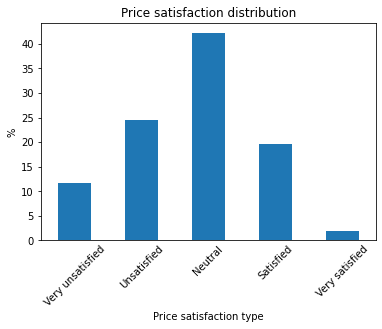

In [31]:
sat_price_df_1['%'].plot.bar()
plt.title('Price satisfaction distribution')
plt.ylabel('%')
plt.xlabel('Price satisfaction type')
plt.tick_params(axis = 'x', length = 0)
plt.xticks(rotation = 45)

# Create some classifications for quantitative variables

### Age

In [32]:
print('Min age = {}; Max age = {};'.format(min(df['age']), max(df['age'])))

Min age = 19; Max age = 72;


In [33]:
age_bins = [18, 25, 30, 40, 50, 60, 70, 80]
df['age_class'] = pd.cut(df['age'], bins = age_bins)
df

,H,gender,age,family_size,house,education,income,purchases_household,sat_product_range,sat_price,age_class
0,1,1,34,4,1,4,2960.0,4.0,3,2,"(30, 40]"
1,2,1,67,1,1,1,980.0,1.0,5,2,"(60, 70]"
2,3,2,46,3,3,5,3500.0,4.0,2,4,"(40, 50]"
3,4,1,22,2,2,3,860.0,1.0,5,3,"(18, 25]"
4,5,2,30,5,2,4,3380.0,4.0,2,3,"(25, 30]"
...,...,...,...,...,...,...,...,...,...,...,...
97,98,1,38,1,2,4,1380.0,1.0,4,3,"(30, 40]"
98,99,1,56,2,2,1,1700.0,2.0,3,3,"(50, 60]"
99,100,1,42,5,1,5,4430.0,5.0,2,4,"(40, 50]"
100,101,2,36,1,2,1,1100.0,1.0,5,1,"(30, 40]"


### Family

In [34]:
print('Min family_size = {}; Max family_size = {};'.format(min(df['family_size']), max(df['family_size'])))

Min family_size = 1; Max family_size = 7;


In [35]:
family_bins = [1, 3, 5, 7]
df['family_size_class'] = pd.cut(df['family_size'], bins = family_bins, include_lowest = True)
df

,H,gender,age,family_size,house,education,income,purchases_household,sat_product_range,sat_price,age_class,family_size_class
0,1,1,34,4,1,4,2960.0,4.0,3,2,"(30, 40]","(3.0, 5.0]"
1,2,1,67,1,1,1,980.0,1.0,5,2,"(60, 70]","(0.999, 3.0]"
2,3,2,46,3,3,5,3500.0,4.0,2,4,"(40, 50]","(0.999, 3.0]"
3,4,1,22,2,2,3,860.0,1.0,5,3,"(18, 25]","(0.999, 3.0]"
4,5,2,30,5,2,4,3380.0,4.0,2,3,"(25, 30]","(3.0, 5.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...
97,98,1,38,1,2,4,1380.0,1.0,4,3,"(30, 40]","(0.999, 3.0]"
98,99,1,56,2,2,1,1700.0,2.0,3,3,"(50, 60]","(0.999, 3.0]"
99,100,1,42,5,1,5,4430.0,5.0,2,4,"(40, 50]","(3.0, 5.0]"
100,101,2,36,1,2,1,1100.0,1.0,5,1,"(30, 40]","(0.999, 3.0]"


### Income

In [36]:
print('Min income = {}; Max income = {};'.format(min(df['income']), max(df['income'])))

Min income = 770.0; Max income = 4850.0;


In [37]:
income_bins = [500, 1000, 2000, 3000, 4000, 5000]
df['income_class'] = pd.cut(df['income'], bins = income_bins)
df

,H,gender,age,family_size,house,education,income,purchases_household,sat_product_range,sat_price,age_class,family_size_class,income_class
0,1,1,34,4,1,4,2960.0,4.0,3,2,"(30, 40]","(3.0, 5.0]","(2000, 3000]"
1,2,1,67,1,1,1,980.0,1.0,5,2,"(60, 70]","(0.999, 3.0]","(500, 1000]"
2,3,2,46,3,3,5,3500.0,4.0,2,4,"(40, 50]","(0.999, 3.0]","(3000, 4000]"
3,4,1,22,2,2,3,860.0,1.0,5,3,"(18, 25]","(0.999, 3.0]","(500, 1000]"
4,5,2,30,5,2,4,3380.0,4.0,2,3,"(25, 30]","(3.0, 5.0]","(3000, 4000]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,98,1,38,1,2,4,1380.0,1.0,4,3,"(30, 40]","(0.999, 3.0]","(1000, 2000]"
98,99,1,56,2,2,1,1700.0,2.0,3,3,"(50, 60]","(0.999, 3.0]","(1000, 2000]"
99,100,1,42,5,1,5,4430.0,5.0,2,4,"(40, 50]","(3.0, 5.0]","(4000, 5000]"
100,101,2,36,1,2,1,1100.0,1.0,5,1,"(30, 40]","(0.999, 3.0]","(1000, 2000]"


# - Using that classifications generate frequency distributions for the variables
# - Also create histograms using the counts and using percentages

### Age

In [38]:
age_df_1 = pd.crosstab(df['age_class'], 'Count')
n = age_df_1['Count'].sum()
age_df_1['%'] = age_df_1 / n * 100
age_df_1.columns.name = ''
age_df_1.index.astype(str)
#age_df_1.loc['Total'] = age_df_1.sum()
age_df_1

,Count,%
age_class,,
"(18, 25]",10,9.803922
"(25, 30]",15,14.705882
"(30, 40]",30,29.411765
"(40, 50]",22,21.568627
"(50, 60]",17,16.666667
"(60, 70]",7,6.862745
"(70, 80]",1,0.980392


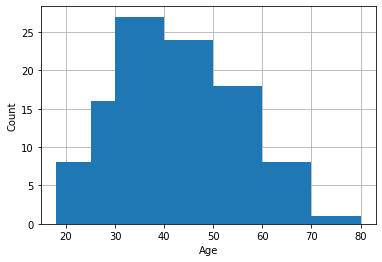

In [39]:
df['age'].plot.hist(bins = age_bins, zorder = 3)
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True, zorder = 0)

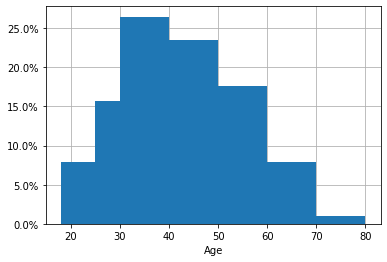

In [40]:
df['age'].plot.hist(bins = age_bins, weights = np.ones(n) / n, zorder = 3)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.ylabel('')
plt.xlabel('Age')
plt.grid(True, zorder = 0)

### Family

In [41]:
family_size_df_1 = pd.crosstab(df['family_size_class'], 'Count')
n = family_size_df_1['Count'].sum()
family_size_df_1['%'] = family_size_df_1 / n * 100
family_size_df_1.columns.name = ''
family_size_df_1.index.astype(str)
family_size_df_1.loc['Total'] = family_size_df_1.sum()
family_size_df_1

,Count,%
family_size_class,,
"(0.999, 3.0]",70.0,68.627451
"(3.0, 5.0]",26.0,25.490196
"(5.0, 7.0]",6.0,5.882353
Total,102.0,100.000000


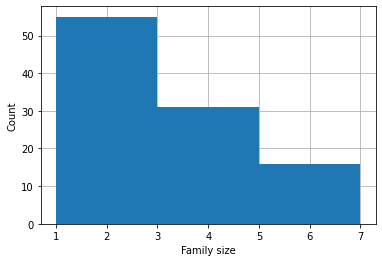

In [42]:
df['family_size'].plot.hist(bins = family_bins, zorder = 3)
plt.xlabel('Family size')
plt.ylabel('Count')
plt.grid(True, zorder = 0)

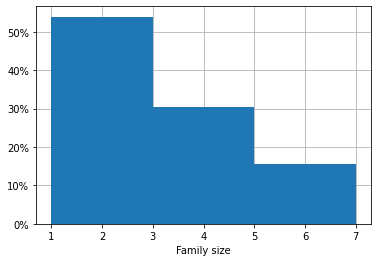

In [43]:
df['family_size'].plot.hist(bins = family_bins, weights = np.ones(n) / n, zorder = 3)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.ylabel('')
plt.xlabel('Family size')
plt.grid(True, zorder = 0)

### Income

In [44]:
income_df_1 = pd.crosstab(df['income_class'], 'Count')
n = income_df_1['Count'].sum()
income_df_1['%'] = income_df_1 / n * 100
income_df_1.columns.name = ''
income_df_1.index.astype(str)
income_df_1.loc['Total'] = income_df_1.sum()
income_df_1

,Count,%
income_class,,
"(500, 1000]",6.0,6.0
"(1000, 2000]",34.0,34.0
"(2000, 3000]",36.0,36.0
"(3000, 4000]",17.0,17.0
"(4000, 5000]",7.0,7.0
Total,100.0,100.0


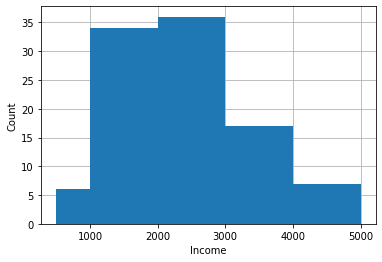

In [45]:
df['income'].plot.hist(bins = income_bins, zorder = 3)
plt.xlabel('Income')
plt.ylabel('Count')
plt.grid(True, zorder = 0)

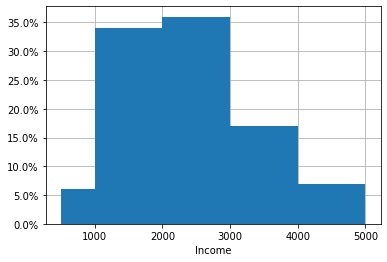

In [46]:
df['income'].plot.hist(bins = income_bins, weights = np.ones(n) / n, zorder = 3)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.ylabel('')
plt.xlabel('Income')
plt.grid(True, zorder = 0)

### Purchases household

In [47]:
purchases_household_df_1 = pd.crosstab(df['purchases_household'], 'Count')
n = purchases_household_df_1['Count'].sum()
purchases_household_df_1['%'] = purchases_household_df_1 / n * 100
purchases_household_df_1.columns.name = ''
purchases_household_df_1.index.astype(str)
purchases_household_df_1.index = ['[0, 250)', '[250, 500)', '[500, 750)', '[750, 999)', '[1000, inf)']
purchases_household_df_1.loc['Total'] = purchases_household_df_1.sum()
purchases_household_df_1

,Count,%
"[0, 250)",17.0,16.831683
"[250, 500)",39.0,38.613861
"[500, 750)",20.0,19.801980
"[750, 999)",19.0,18.811881
"[1000, inf)",6.0,5.940594
Total,101.0,100.000000


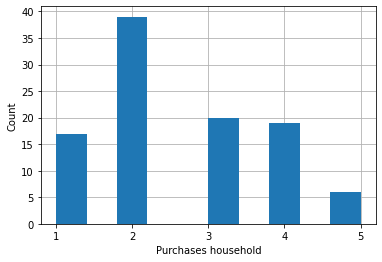

In [103]:
df['purchases_household'].plot.hist(zorder = 3)
plt.xlabel('Purchases household')
plt.ylabel('Count')
plt.xticks(np.arange(min(df['purchases_household']) , max(df['purchases_household']) + 1, 1.0))
plt.grid(True, zorder = 0)
# fix bars placement

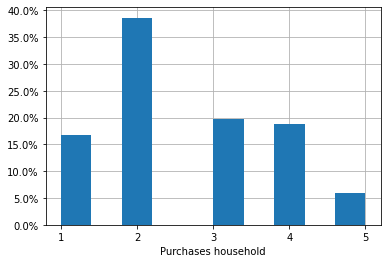

In [49]:
df['purchases_household'].plot.hist(weights = np.ones(n) / n, zorder = 3)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.ylabel('')
plt.xlabel('Purchases household')
plt.xticks(np.arange(min(df['purchases_household']) , max(df['purchases_household']) + 1, 1.0))
plt.grid(True, zorder = 0)
# fix bars placement

# Edit other parts of the figures so that the figure shows the necessary information, remember what has been said

# - Select variables for two different cross-tabulations. Investigate whether there is a dependency between the variables.
# - Present the results of the cross-tabulations in tables and graphically

### Housing and age

In [50]:
housing_age_df = pd.crosstab(df['age_class'], df['house'])
housing_age_df.columns = ['own apartment', 'rental apartment', 'employee housing']
housing_age_df

,own apartment,rental apartment,employee housing
age_class,,,
"(18, 25]",2,8,0
"(25, 30]",2,13,0
"(30, 40]",12,14,4
"(40, 50]",8,7,7
"(50, 60]",10,4,3
"(60, 70]",5,2,0
"(70, 80]",1,0,0


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '(18, 25]'),
  Text(1, 0, '(25, 30]'),
  Text(2, 0, '(30, 40]'),
  Text(3, 0, '(40, 50]'),
  Text(4, 0, '(50, 60]'),
  Text(5, 0, '(60, 70]'),
  Text(6, 0, '(70, 80]')])

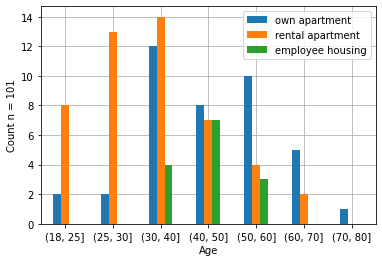

In [77]:
housing_age_df.plot.bar(zorder = 3)
plt.grid(True, zorder = 0)
plt.xlabel('Age')
plt.ylabel('Count n = ' + str(n))
plt.xticks(rotation = 0)

### Education and income

In [52]:
education_income_df = pd.crosstab(df['education'], df['income_class'])
education_income_df.index = ['primary school', 'vocational school', 'secondary school', 'applied science university', 'other university']
education_income_df

income_class,"(500, 1000]","(1000, 2000]","(2000, 3000]","(3000, 4000]","(4000, 5000]"
primary school,1,11,4,0,0
vocational school,0,9,13,0,0
secondary school,5,0,2,1,0
applied science university,0,9,13,10,1
other university,0,5,4,6,6


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'primary school'),
  Text(1, 0, 'vocational school'),
  Text(2, 0, 'secondary school'),
  Text(3, 0, 'applied science university'),
  Text(4, 0, 'other university')])

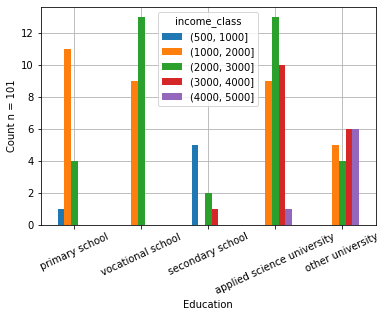

In [76]:
education_income_df.plot.bar(zorder = 3)
plt.grid(True, zorder = 0)
plt.xlabel('Education')
plt.ylabel('Count n = ' + str(n))
plt.xticks(rotation = 25)

### Purchase houshold and product range satisfaction

### Note: add range to product satisfaction in above visuals

In [54]:
purchase_prod_sat_df = pd.crosstab(df['sat_product_range'], df['purchases_household'])
purchase_prod_sat_df.index = ['Very unsatisfied', 'Unsatisfied', 'Neutral', 'Satisfied', 'Very satisfied']
purchase_prod_sat_df.columns = ['[0, 250)', '[250, 500)', '[500, 750)', '[750, 999)', '[1000, inf)']
purchase_prod_sat_df

,"[0, 250)","[250, 500)","[500, 750)","[750, 999)","[1000, inf)"
Very unsatisfied,0,1,0,0,1
Unsatisfied,0,7,3,7,4
Neutral,2,11,8,8,1
Satisfied,2,11,5,3,0
Very satisfied,13,9,4,1,0


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Very unsatisfied'),
  Text(1, 0, 'Unsatisfied'),
  Text(2, 0, 'Neutral'),
  Text(3, 0, 'Satisfied'),
  Text(4, 0, 'Very satisfied')])

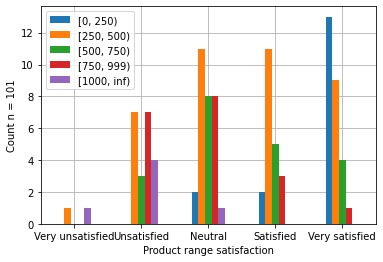

In [72]:
purchase_prod_sat_df.plot.bar(zorder = 3)
plt.grid(True, zorder = 0)
plt.xlabel('Product range satisfaction')
plt.ylabel('Count n = ' + str(n))
plt.xticks(rotation = 0)

### Purchase household and price satisfaction

In [56]:
purchase_price_sat_df = pd.crosstab(df['sat_price'], df['purchases_household'])
purchase_price_sat_df.index = ['Very unsatisfied', 'Unsatisfied', 'Neutral', 'Satisfied', 'Very satisfied']
purchase_price_sat_df.columns = ['[0, 250)', '[250, 500)', '[500, 750)', '[750, 999)', '[1000, inf)']
purchase_price_sat_df

,"[0, 250)","[250, 500)","[500, 750)","[750, 999)","[1000, inf)"
Very unsatisfied,5,3,3,0,0
Unsatisfied,5,10,5,5,0
Neutral,5,18,10,9,1
Satisfied,2,7,2,4,5
Very satisfied,0,1,0,1,0


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Very unsatisfied'),
  Text(1, 0, 'Unsatisfied'),
  Text(2, 0, 'Neutral'),
  Text(3, 0, 'Satisfied'),
  Text(4, 0, 'Very satisfied')])

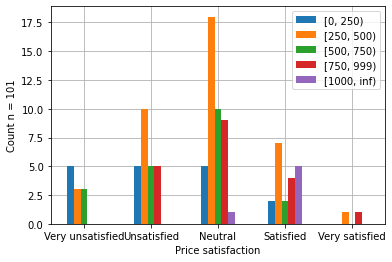

In [75]:
purchase_price_sat_df.plot.bar(zorder = 3)
plt.grid(True, zorder = 0)
plt.xlabel('Price satisfaction')
plt.ylabel('Count n = ' + str(n))
plt.xticks(rotation = 0)

# Use the Chi2 test to interpret whether there is a dependency between variables

### Housing and age

In [58]:
house_age_chi2, house_age_p, house_age_dof, house_age_expected = chi2_contingency(housing_age_df)

In [59]:
print('p = {}'.format(house_age_p))

p = 0.0034853975444914293


### Education and income

In [60]:
education_income_chi2, education_income_p, education_income_dof, education_income_expected = chi2_contingency(education_income_df)

In [61]:
print('p = {}'.format(education_income_p))
print('The number is (9.285659701260166 * 10**-13)')

p = 9.285659701260166e-13
The number is (9.285659701260166 * 10**-13)


### Purchase houshold and product range satisfaction

In [62]:
purchase_product_range_chi2, purchase_product_range_p, purchase_product_range_dof, purchase_product_range_expected = chi2_contingency(purchase_prod_sat_df)

In [63]:
print('p = {}'.format(purchase_product_range_p))
print('The number is (3.8925510710773616 * 10**-05)')

p = 3.8925510710773616e-05
The number is (3.8925510710773616 * 10**-05)


### Purchase household and price satisfaction

In [64]:
purchase_price_sat_chi2, purchase_price_sat_p, purchase_price_sat_dof, purchase_price_sat_expected = chi2_contingency(purchase_price_sat_df)

In [65]:
print('p = {}'.format(purchase_price_sat_p))

p = 0.028896086371048624
